# ----------------------------   DIGITAL-ANALOG CONVERTER ----------------------------  

## Gustavo Arteaga 
## Universidad Nacional de Colombia - Facultad de minas 
## Tópicos Azanzados de Procesamiento Digital de Señales
### 2024-03-07

# ---------------------------------------------------------------------------------------

# 1. SAMPLE & HOLD


### Sample and Hold Circuit

![Circuit Diagram of Sample and Hold Circuit](https://electronicscoach.com/wp-content/uploads/2017/12/sample-and-hold-intro-diagram.jpg "Circuit Diagram of Sample and Hold Circuit")
## Circuit Diagram of Sample and Hold Circuit

![Circuit Diagram of Sample and Hold Circuit](https://electronicscoach.com/wp-content/uploads/2017/12/Circuit-diagram-of-Sample-and-Hold-Circuit.jpg "Circuit Diagram of Sample and Hold Circuit")

## Input and Output Waveforms
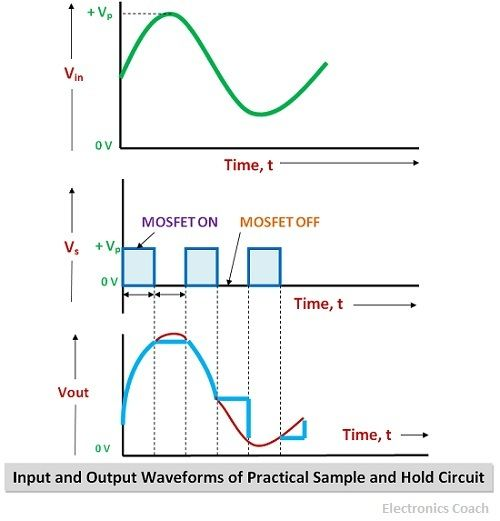

#### Tomado de:  https://electronicscoach.com/sample-and-hold-circuit.html

# 🛠️👨🏻‍💻</>🔧 

## Generate analog signal (sinusoidal wave)

In [45]:
import numpy as np
import matplotlib.pyplot as plt

• frequency = 1: Define la frecuencia de la señal a 1 Hertz (Hz), lo que significa que la señal completa un ciclo completo cada segundo.

• sampling_rate = 100: Establece la tasa de muestreo a 100 Hz. Esto significa que se tomarán 100 muestras de la señal por segundo. La tasa de muestreo determina cuán frecuentemente se muestrea la señal analógica para convertirla en una forma digital.

• duration = 2: La duración de la señal es de 2 segundos.

• paso de 1/sampling_rate (0.01 segundos)

• La expresión 2 * np.pi * frequency * time calcula el ángulo (en radianes) para cada punto en el tiempo, necesario para generar la onda sinusoidal. Multiplicar la frecuencia por 2 * np.pi convierte la frecuencia de Hz a radianes por segundo, que es la unidad esperada por la función seno (np.sin). 

In [49]:
# Define signal parameters
frequency = 1  # Signal frequency in Hz
sampling_rate = 100  # Hz
duration = 2  # seconds
time = np.arange(0, duration, 1/sampling_rate)  # Time vector

# Generate analog signal (sinusoidal wave)
analog_signal = np.sin(2 * np.pi * frequency * time)
# print(time)
# print(analog_signal.shape)


El resultado es una señal sinusoidal analógica que oscila con una frecuencia de 1 Hz durante 2 segundos, con una tasa de muestreo de 100 Hz, lo que significa que se generan 200 puntos de datos para representar esta señal en el dominio digital 

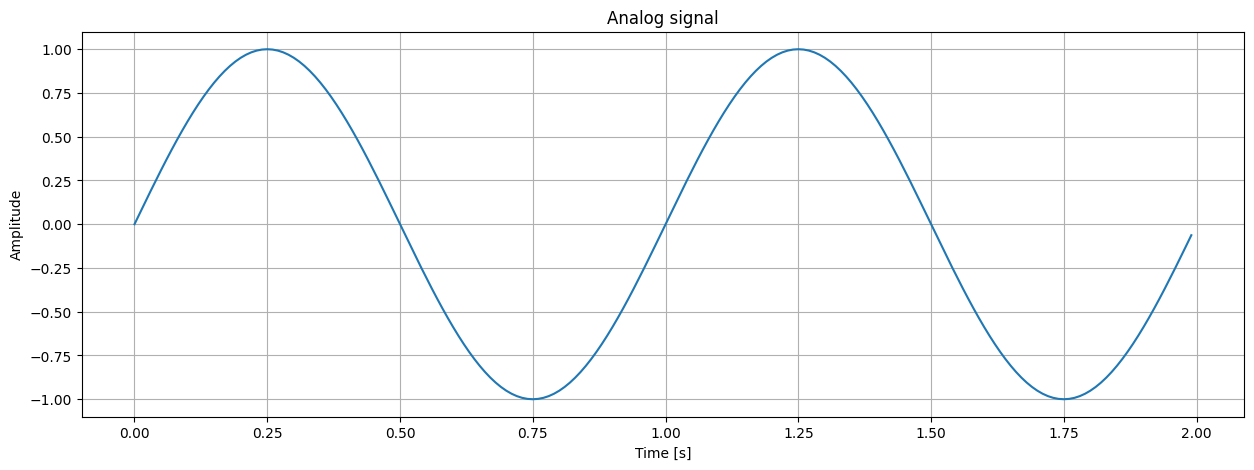

In [50]:
# plot signal
plt.figure(figsize=(15, 5))
plt.plot(time, analog_signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Analog signal')
plt.grid(True)
plt.show()

## Simulate sampling and holding

In [52]:
# Simulate sampling and holding
sampling_period = 0.2  # seconds
sampling_indices = np.arange(0, len(time), int(sampling_period * sampling_rate))
sampled_signal = np.zeros_like(analog_signal)

for i in range(len(sampling_indices)-1):
    sampled_signal[sampling_indices[i]:sampling_indices[i+1]] = analog_signal[sampling_indices[i]]

# print("sampling_indices:")
# print(sampling_indices)



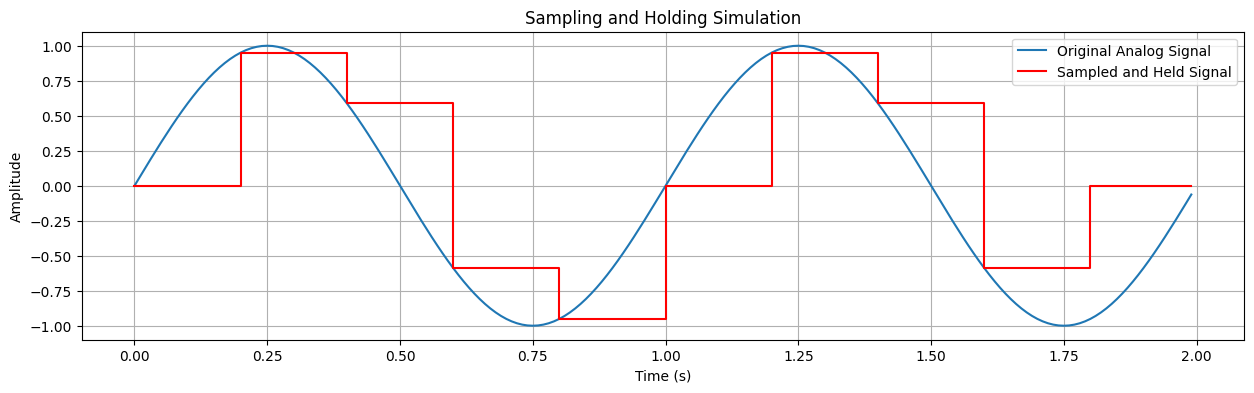

In [53]:
# Visualize original signal and sampled and held signal
plt.figure(figsize=(15, 4))
plt.plot(time, analog_signal, label='Original Analog Signal')
plt.step(time, sampled_signal, where='post', label='Sampled and Held Signal', color='r')
plt.title('Sampling and Holding Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Interactive Project

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets

def simulate_sample_hold(frequency, sampling_rate, duration, sampling_period):
    time = np.arange(0, duration, 1/sampling_rate)
    analog_signal = np.sin(2 * np.pi * frequency * time)
    
    sampling_indices = np.arange(0, len(time), int(sampling_period * sampling_rate))
    sampled_signal = np.zeros_like(analog_signal)
    for i in range(len(sampling_indices)-1):
        sampled_signal[sampling_indices[i]:sampling_indices[i+1]] = analog_signal[sampling_indices[i]]
    
    plt.figure(figsize=(15, 4))
    plt.plot(time, analog_signal, label='Original Analog Signal')
    plt.step(time, sampled_signal, where='post', label='Sampled and Held Signal', color='r')
    plt.title('Interactive Sampling and Holding Simulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create widgets for the sliders
interactive_plot = interactive(simulate_sample_hold, 
                               frequency=widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Frequency:'),
                               sampling_rate=widgets.IntSlider(value=100, min=10, max=500, step=10, description='Sampling Rate:'),
                               duration=widgets.FloatSlider(value=2, min=1, max=5, step=0.1, description='Duration:'),
                               sampling_period=widgets.FloatSlider(value=0.2, min=0.01, max=1, step=0.01, description='Sampling Period:'))
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Frequency:', max=10.0, min=0.1), IntSlider(value=100…

## Signal Frequency Behavior

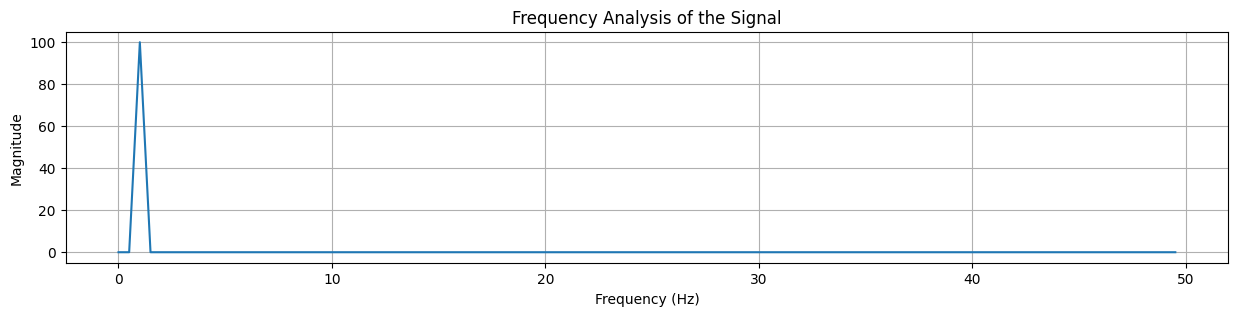

In [70]:
import numpy as np
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Re-define the signal parameters and generate the analog signal (sinusoidal)
frequency = 1  # The signal's frequency in Hertz (Hz)
sampling_rate = 100  # The sampling rate in Hertz (Hz)
duration = 2  # The duration of the signal in seconds
time = np.arange(0, duration, 1/sampling_rate)  # Create a time vector

analog_signal = np.sin(2 * np.pi * frequency * time)  # Generate the analog (sinusoidal) signal

# Calculate the FFT of the signal
fft_result = fft(analog_signal)  # Perform the Fast Fourier Transform on the signal
# Calculate the frequencies for the FFT components
frequencies = fftfreq(len(time), 1/sampling_rate)  # Get the corresponding frequency vector

# Take the magnitude of the FFT and frequencies (only half, as it is symmetric and conjugated)
n = len(time)
fft_magnitude = np.abs(fft_result)[:n // 2]  # Calculate the magnitude of the FFT (only half is needed due to symmetry)
frequencies = frequencies[:n // 2]  # Adjust the frequency vector to match the FFT magnitude

# Plot the FFT magnitude vs. frequencies
plt.figure(figsize=(15, 3))  # Set the figure size
plt.plot(frequencies, fft_magnitude)  # Plot the FFT magnitude versus frequencies
plt.title('Frequency Analysis of the Signal')  # Graph title
plt.xlabel('Frequency (Hz)')  # X-axis label
plt.ylabel('Magnitude')  # Y-axis label
plt.grid(True)  # Show grid
plt.show()  # Display the graph


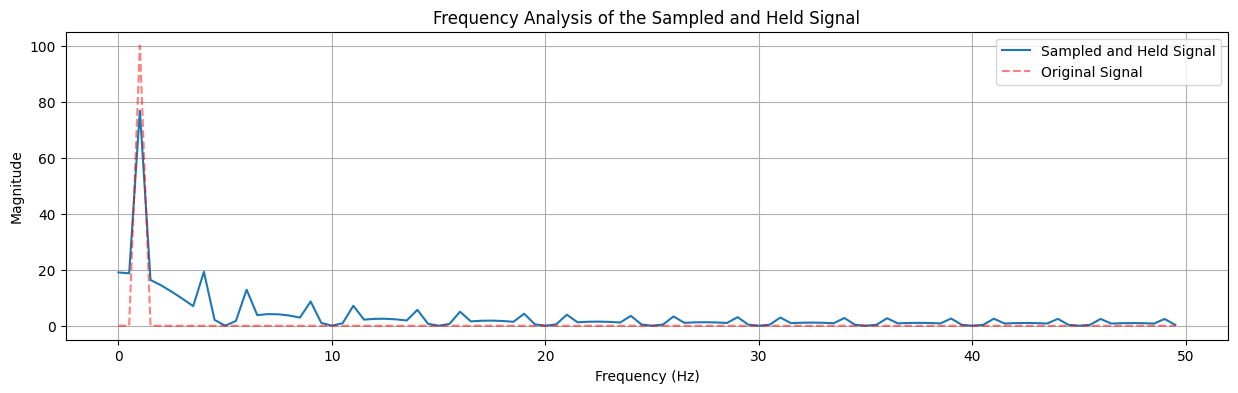

In [71]:
# Generate the sampled and held signal with the specified sampling period
sampling_period = 0.20  # seconds
sampling_indices = np.arange(0, len(time), int(sampling_period * sampling_rate))
sampled_signal = np.zeros_like(analog_signal)

for i in range(len(sampling_indices)-1):
    sampled_signal[sampling_indices[i]:sampling_indices[i+1]] = analog_signal[sampling_indices[i]]

# Calculate the FFT of the sampled and held signal
fft_result_sampled = fft(sampled_signal)
# Calculate the frequencies for the FFT components of the sampled and held signal
frequencies_sampled = fftfreq(len(time), 1/sampling_rate)

# Take the magnitude of the FFT and frequencies (only half, as it is symmetric and conjugated)
fft_magnitude_sampled = np.abs(fft_result_sampled)[:n // 2]
frequencies_sampled = frequencies_sampled[:n // 2]

# Plot the FFT magnitude vs. frequencies for the sampled and held signal
plt.figure(figsize=(15, 4))
plt.plot(frequencies_sampled, fft_magnitude_sampled, label='Sampled and Held Signal')
# Add fft_magnitude of the original signal for comparison
plt.plot(frequencies, fft_magnitude, label='Original Signal', alpha=0.5, linestyle='--', color='r')
plt.title('Frequency Analysis of the Sampled and Held Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()
